# Matplotlib

[Matplotlib](http://matplotlib.org/) adds Matlab-style graphics to Python and is well-integrated with the IPython notebook

_Note_: A lot of these examples are taken from the Matplotlib gallery

In [1]:
# Import matplotlib
from matplotlib import pyplot as plt

# IPython magic for showing plots inline
%matplotlib inline

# Other useful imports
import numpy as np
import math

[0, 2, 0, 5]

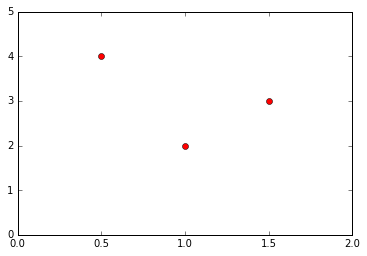

In [2]:
# Plot a few points
pts = np.array([[1, 2], [1.5, 3], [0.5, 4]])
x = pts[:,0]
y = pts[:,1]
plt.plot(x, y, 'ro')

xmin, xmax, ymin, ymax = 0, 2, 0, 5
plt.axis([xmin, xmax, ymin, ymax])

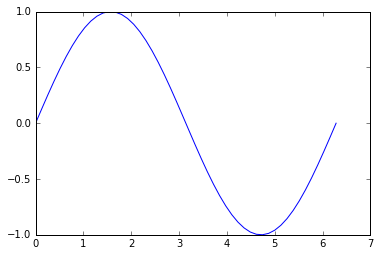

In [3]:
# Simple plot of sin(x)
x = np.linspace(0.0, 2*math.pi, num=50)
y = np.sin(x)
plt.plot(x,y)

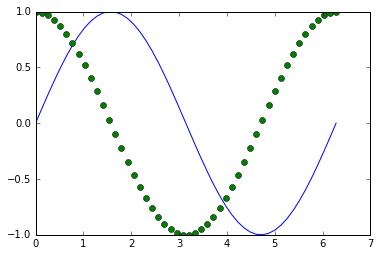

In [4]:
# Two plots, one figure
x = np.linspace(0.0, 2*math.pi, num=50)
plt.plot(x, np.sin(x), 'b-', x, np.cos(x), 'go')

## Bar charts

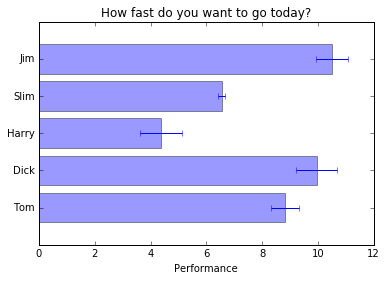

In [5]:
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

## Histograms

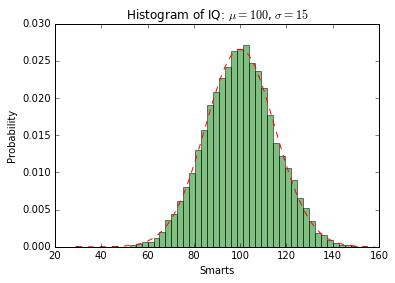

In [6]:
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
from matplotlib import mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

## Box plots

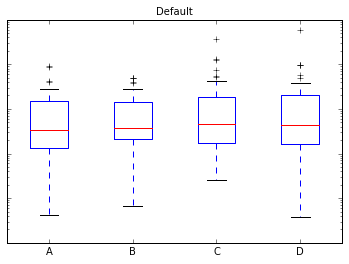

In [7]:
# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = ['A', 'B', 'C', 'D']

fig, ax = plt.subplots()
plt.boxplot(data, labels=labels)
ax.set_title('Default', fontsize=10)
ax.set_yscale('log')
ax.set_yticklabels([])

plt.show()

## Density plots

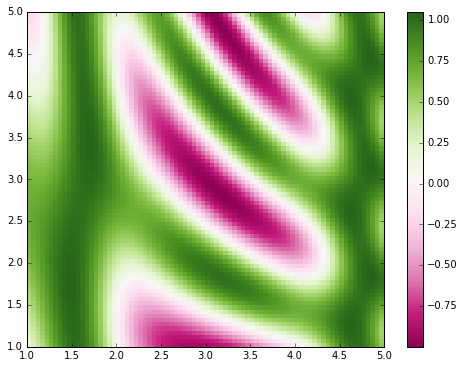

In [8]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


dx, dy = 0.05, 0.05
x, y = np.mgrid[1:5 + dx:dx, 1:5 + dy:dy]  # generate 2 2d grids for the x & y bounds
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]

plt.figure(figsize=(8,6))
im = plt.pcolormesh(x, y, z, cmap=plt.get_cmap('PiYG'))
plt.colorbar()
plt.savefig('myfigure.pdf')
plt.show()

# Seaborn

Seaborn is a more recent library with two key features:
* Enforce much more visually pleasing default settings for matploblib plots
* Provide simple tools to go straight from data to visualization

_Note_: Most examples below are from the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html#example-gallery)

In [9]:
import seaborn as sns  # After this statement, all matplotlib plots will look better

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


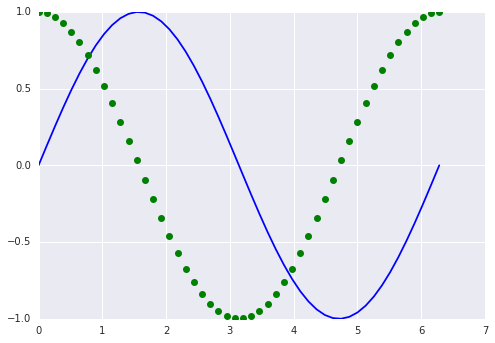

In [10]:
# Same plot as before:
# Two plots, one figure
x = np.linspace(0.0, 2*math.pi, num=50)
plt.plot(x, np.sin(x), 'b-', x, np.cos(x), 'go')

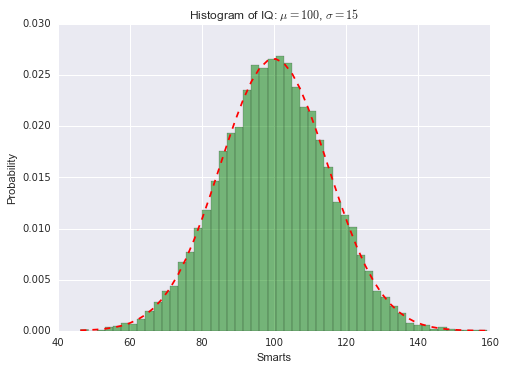

In [11]:
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
from matplotlib import mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


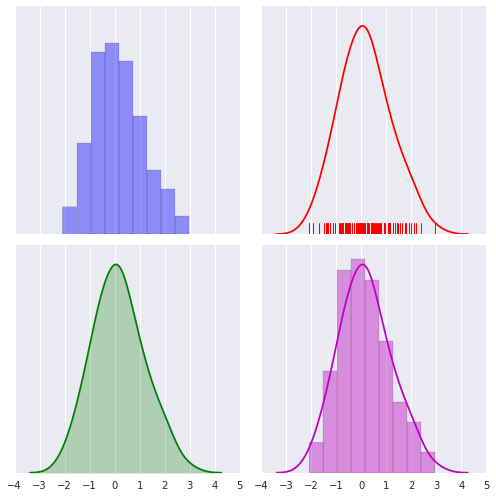

In [12]:
# Most useful method in Seaborn, IMHO: distplot

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = np.random.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [13]:
# Seaborn plays well with Pandas (next section) to make plotting structured data simple

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


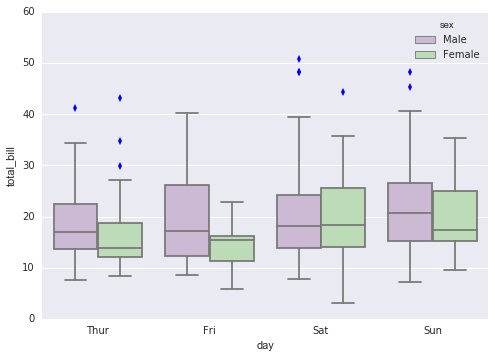

In [14]:
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")

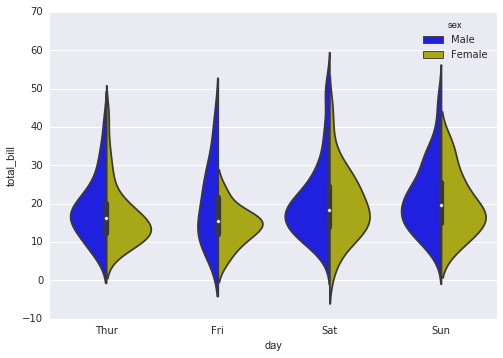

In [15]:
# And you can get fancier than boxplots....
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               palette={"Male": "b", "Female": "y"})

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472  


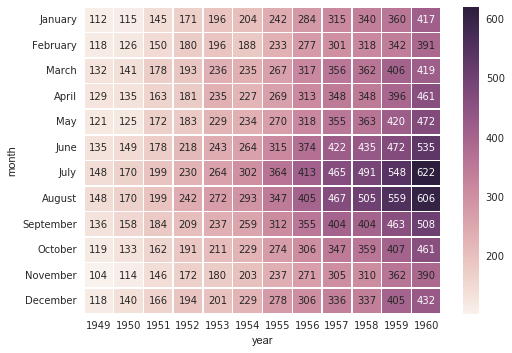

In [16]:
# Easy heatmaps

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
print(flights_long.head())
print(flights.head())

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

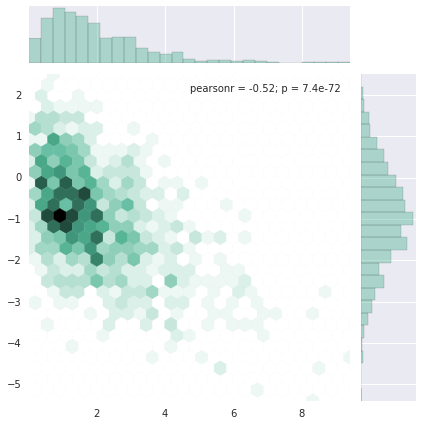

In [17]:
# Joint plots
x = np.random.gamma(2, size=1000)
y = -.5 * x + np.random.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

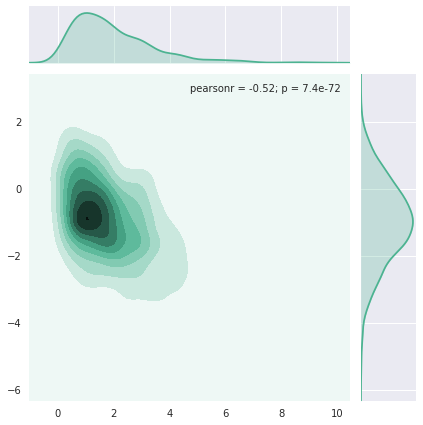

In [18]:
sns.jointplot(x, y, kind="kde", color="#4CB391")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


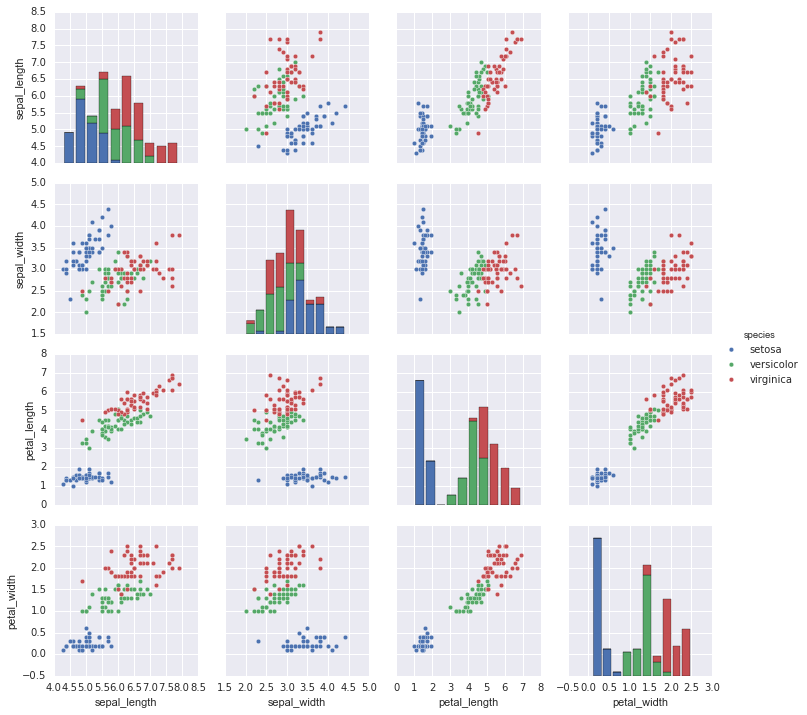

In [19]:
# Looking at many pairwise joint distributions
df = sns.load_dataset("iris")
print(df.head())
sns.pairplot(df, hue="species")

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


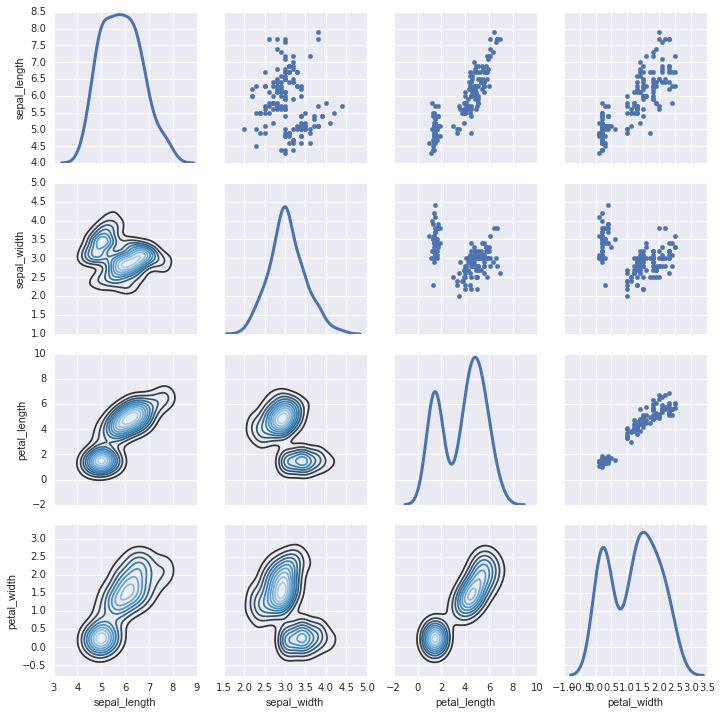

In [20]:
# Getting fancier
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)